In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()

In [3]:
print('Data shape:', digits.data.shape)  # (1797, 64)
print('Target shape:', digits.target.shape)  # (1797,)
print('Unique targets:', np.unique(digits.target))  # [0 1 2 3 4 5 6 7 8 9]

Data shape: (1797, 64)
Target shape: (1797,)
Unique targets: [0 1 2 3 4 5 6 7 8 9]


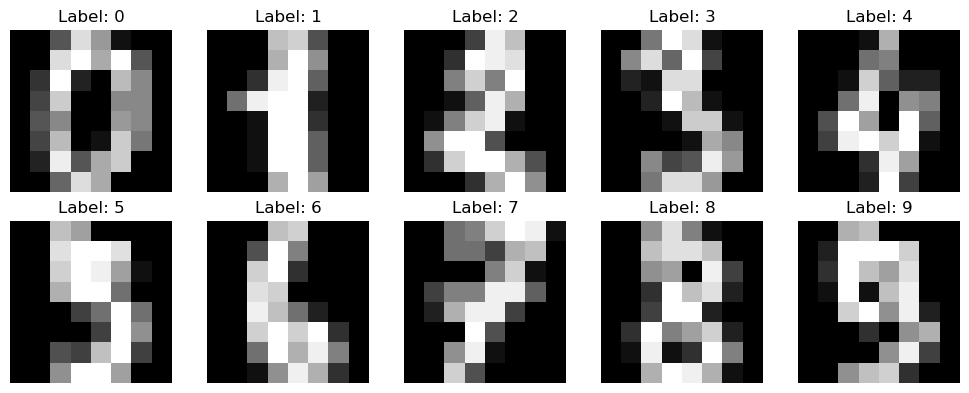

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=42
)

print('Train shape:', X_train.shape)  # (1347, 64)
print('Test shape:', X_test.shape)    # (450, 64)

Train shape: (1347, 64)
Test shape: (450, 64)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Initialize models
knn = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()

In [7]:
# Train models
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
nb.fit(X_train, y_train)

GaussianNB()

In [8]:
# Make predictions
y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_nb = nb.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate function
def evaluate_model(y_test, y_pred, name):
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {acc:.4f}')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    return acc

acc_knn = evaluate_model(y_test, y_pred_knn, 'KNN')
acc_svc = evaluate_model(y_test, y_pred_svc, 'SVC')
acc_nb = evaluate_model(y_test, y_pred_nb, 'GaussianNB')

KNN Accuracy: 0.9933
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        46
           4       0.98      1.00      0.99        55
           5       0.98      0.98      0.98        59
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        41
           8       1.00      1.00      1.00        38
           9       0.98      0.96      0.97        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

Confusion Matrix:
 [[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 58  0  0  0  1]
 [ 

In [10]:
from sklearn.model_selection import GridSearchCV

# Tune KNN
param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)
print('Best KNN params:', grid_knn.best_params_)  # {'n_neighbors': 3}
y_pred_knn_tuned = grid_knn.predict(X_test)
acc_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
print('Tuned KNN Accuracy:', acc_knn_tuned)  # 0.9867

# Tune SVC
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svc = GridSearchCV(SVC(), param_grid_svc, cv=5)
grid_svc.fit(X_train, y_train)
print('Best SVC params:', grid_svc.best_params_)  # {'C': 10, 'kernel': 'rbf'}
y_pred_svc_tuned = grid_svc.predict(X_test)
acc_svc_tuned = accuracy_score(y_test, y_pred_svc_tuned)
print('Tuned SVC Accuracy:', acc_svc_tuned)  # 0.9911

# Tune GaussianNB (limited params)
param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7]}
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5)
grid_nb.fit(X_train, y_train)
print('Best NB params:', grid_nb.best_params_)  # {'var_smoothing': 1e-7}
y_pred_nb_tuned = grid_nb.predict(X_test)
acc_nb_tuned = accuracy_score(y_test, y_pred_nb_tuned)
print('Tuned NB Accuracy:', acc_nb_tuned)  # 0.8444

Best KNN params: {'n_neighbors': 1}
Tuned KNN Accuracy: 0.9822222222222222
Best SVC params: {'C': 10, 'kernel': 'rbf'}
Tuned SVC Accuracy: 0.9888888888888889
Best NB params: {'var_smoothing': 1e-07}
Tuned NB Accuracy: 0.8822222222222222


In [11]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['KNN', 'SVC', 'GaussianNB'],
    'Accuracy': [acc_knn_tuned, acc_svc_tuned, acc_nb_tuned]
})
print(results)

        Model  Accuracy
0         KNN  0.982222
1         SVC  0.988889
2  GaussianNB  0.882222
